In [1]:
import pandas as pd
import numpy as np

# Datos demográficos

In [2]:
users = pd.read_csv('../../data/originales/Prado_users.csv')

users.replace('<12', '0-12', inplace=True)
users.replace('>70', '70+', inplace=True)
users.replace('Argenitina', 'Argentina', inplace=True)

usersFC = users.copy()
users.head(5)

,userId,age,gender,country
0,1,55-64,male,Spain
1,2,25-34,female,Spain
2,3,18-24,female,Spain
3,4,18-24,female,Spain
4,5,35-44,male,Spain


## EDAD

In [3]:
age = usersFC['age'].unique()
age

array(['55-64', '25-34', '18-24', '35-44', '65-70', '45-54', '0-12',
       '13-17', '70+'], dtype=object)

In [4]:
age.sort()
age = age.reshape(3,3)
ageRanges = { 'young' : age[0],
              'adult': age[1],
              'senior' : age[2]}

ranges = {}
for key in ageRanges:
    for i in ageRanges[key]:
        ranges[i] = key

for key in ranges:
    usersFC.replace(key, ranges[key], inplace=True)


In [5]:
for key in usersFC['age'].unique():
    usersFC[key] = ''
    usersFC.loc[usersFC['age'] == key, key] = 'X'

usersFC.drop(['age'], axis=1, inplace=True)

## Género

In [6]:
usersFC['gender'].unique()

array(['male', 'female'], dtype=object)

In [7]:
for key in usersFC['gender'].unique():
    usersFC[key] = ''
    usersFC.loc[usersFC['gender'] == key, key] = 'X'

usersFC.drop(['gender'], axis=1, inplace=True)

## Nacionalidad

In [8]:
usersFC['country'].unique()

array(['Spain', 'USA', 'Other', 'Mexico', 'France', 'Japan', 'Brazil',
       'Italy', 'Germany', 'Argentina', 'Canada'], dtype=object)

In [9]:
for key in usersFC['country'].unique():
    usersFC[key] = ''
    usersFC.loc[usersFC['country'] == key, key] = 'X'

usersFC.drop(['country'], axis=1, inplace=True)


## FORMAL CONTEXT

In [10]:
usersFC.head(3)

,userId,senior,adult,young,male,female,Spain,USA,Other,Mexico,France,Japan,Brazil,Italy,Germany,Argentina,Canada
0,1,X,,,X,,X,,,,,,,,,,
1,2,,X,,,X,X,,,,,,,,,,
2,3,,,X,,X,X,,,,,,,,,,


In [11]:
from concepts import Context
demoLattice = Context.fromstring(usersFC.to_csv(index=False), frmat='csv')

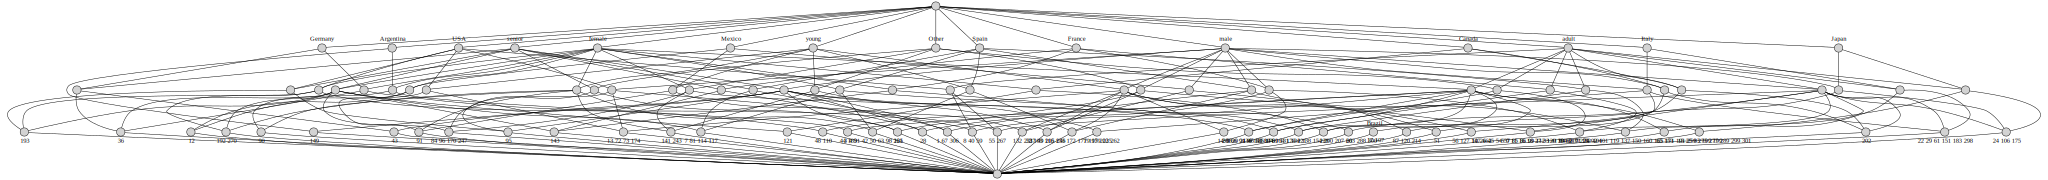

In [12]:
demoLattice.lattice.graphviz()

In [13]:

for extent, intent in demoLattice.lattice:
    if (len(intent) == 1): 
        print(intent, extent)

('Germany',) ('36', '43', '48', '110')
('Argentina',) ('44', '90', '149', '189')
('Canada',) ('51', '121', '202', '228')
('Mexico',) ('12', '87', '91', '120', '132', '214', '231')
('Japan',) ('15', '24', '25', '60', '83', '106', '109', '175', '199')
('USA',) ('8', '13', '40', '55', '59', '72', '73', '95', '174', '192', '193', '267', '270')
('France',) ('14', '28', '38', '58', '69', '77', '102', '104', '136', '140', '143', '144', '164', '178', '221')
('Italy',) ('19', '22', '29', '56', '61', '65', '127', '147', '151', '153', '159', '162', '183', '225', '298')
('senior',) ('1', '7', '12', '19', '28', '36', '43', '60', '67', '81', '84', '95', '96', '114', '117', '121', '143', '149', '159', '170', '193', '225', '247', '261', '306')
('Other',) ('10', '26', '30', '37', '45', '49', '54', '57', '66', '84', '85', '86', '94', '96', '97', '99', '112', '129', '135', '141', '170', '176', '194', '205', '219', '224', '243', '246', '247', '261')
('young',) ('3', '4', '13', '14', '31', '32', '37', '42'

# Datos obras

In [14]:
artworks = pd.read_csv('../../data/originales/Prado_artworks_wikidata.csv')
artworks.head(3)

,ID,Category,Artist,Title,Year,Image URL,Painting Info URL,Artist Info URL,Location,wd:paintingID,wd:paintingURL,wd:artistID,wd:artistURL
0,57726f48edc2cb3880ba012f,Romanticism,Francisco Goya,Charles IV of Spain and his family,1800,https://uploads7.wikiart.org/images/francisco-...,https://www.wikiart.org/en/francisco-goya/char...,https://www.wikiart.org/en/francisco-goya,"Museo del Prado, Madrid, Spain",Q920030,http://www.wikidata.org/entity/Q920030,Q5432,http://www.wikidata.org/entity/Q5432
1,57726e34edc2cb3880b62340,High Renaissance,Correggio,Noli Me Tangere,1534,https://uploads1.wikiart.org/images/correggio/...,https://www.wikiart.org/en/correggio/noli-me-t...,https://www.wikiart.org/en/correggio,"Museo del Prado, Madrid, Spain",Q124362,http://www.wikidata.org/entity/Q124362,Q8457,http://www.wikidata.org/entity/Q8457
2,57726f56edc2cb3880ba7233,Romanticism,Francisco Goya,"Summer, or The Harvest",1786,https://uploads3.wikiart.org/images/francisco-...,https://www.wikiart.org/en/francisco-goya/summ...,https://www.wikiart.org/en/francisco-goya,"Museo del Prado, Madrid, Spain",Q5849818,http://www.wikidata.org/entity/Q5849818,Q5432,http://www.wikidata.org/entity/Q5432


In [15]:
artworksFC = pd.DataFrame()
artworksFC['Title'] = artworks['Title']
artworksFC['Category'] = artworks['Category']
artworksFC['Artist'] = artworks['Artist']

for key in artworksFC['Category'].unique():
    artworksFC[key] = ''
    artworksFC.loc[artworksFC['Category'] == key, key] = 'X'

artworksFC.drop(['Category'], axis=1, inplace=True)

for key in artworksFC['Artist'].unique():
    artworksFC[key] = ''
    artworksFC.loc[artworksFC['Artist'] == key, key] = 'X'

artworksFC.drop(['Artist'], axis=1, inplace=True)

artworksFC


,Title,Romanticism,High Renaissance,Northern Renaissance,Baroque,Francisco Goya,Correggio,Gerard David,Francisco de Zurbaran,Hieronymus Bosch,...,Lucas Cranach the Elder,Andrea del Sarto,Dieric Bouts,Hans Memling,Albrecht Durer,Caravaggio,Hans Baldung,Diego Velazquez,Dirk Bouts,Robert Campin
0,Charles IV of Spain and his family,X,,,,X,,,,,...,,,,,,,,,,
1,Noli Me Tangere,,X,,,,X,,,,...,,,,,,,,,,
2,"Summer, or The Harvest",X,,,,X,,,,,...,,,,,,,,,,
3,Rest on the Flight into Egypt,,,X,,,,X,,,...,,,,,,,,,,
4,The Defense of Cadiz against the English,,,,X,,,,X,,...,,,,,,,,,,
5,The Seven Deadly Sins and the Four Last Things,,,X,,,,,,X,...,,,,,,,,,,
6,The nude maja,X,,,,X,,,,,...,,,,,,,,,,
7,The Extraction of the Stone Madness,,,X,,,,,,X,...,,,,,,,,,,
8,Saturn Devouring His Son,X,,,,X,,,,,...,,,,,,,,,,
9,Hercules Fighting with the Hydra of Lernea,,,,X,,,,X,,...,,,,,,,,,,


In [16]:
artworksLattice = Context.fromstring(artworksFC.to_csv(index=False), frmat='csv')

for extent, intent in artworksLattice.lattice:
    if (len(intent) == 2):
        print(intent, extent)

('High Renaissance', 'Correggio') ('Noli Me Tangere',)
('Northern Renaissance', 'Gerard David') ('Rest on the Flight into Egypt',)
('Northern Renaissance', 'Pieter Bruegel the Elder') ('The Triumph of Death',)
('Northern Renaissance', 'Petrus Christus') ('The Virgin and the Child',)
('Northern Renaissance', 'Jan van Hemessen') ('The Surgeon',)
('Northern Renaissance', 'Joachim Wtewael') ('Adoration by the Shepherds',)
('Northern Renaissance', 'Lucas Cranach the Elder') ('Hunt at the Castle of Torgau in honour of Charles V',)
('High Renaissance', 'Andrea del Sarto') ('Lucrezia di Baccio del Fede',)
('Northern Renaissance', 'Dieric Bouts') ("Triptych of the Virgin's Life",)
('Northern Renaissance', 'Hans Memling') ('Adoration of the Magi Triptych',)
('Northern Renaissance', 'Albrecht Durer') ('Self-Portrait',)
('Baroque', 'Caravaggio') ('David and Goliath',)
('Northern Renaissance', 'Hans Baldung') ('The Three Ages of Man and Death',)
('Baroque', 'Diego Velazquez') ('The Surrender of Bre